In [1]:
! jt -t grade3 -nf opensans

<h1><center>Hello</center></h1>



The purpose of this demo is showcase the pipeline of the Synthesized's tool.



This is a read-only version. To schedule an executable online demo with a preferred dataset, please contact our team at team@synthesized.io

<h1><center>About Synthesized</center></h1>


Synthesized unleashes the potential of commercial data by addressing compliance and technological hurdles that hinder data processing. Their software is an environment-deployable learning engine that can be exported off-network and generate synthetic data based on relationships learned whilst the engine was on-network against a real data source. 

__Business needs__
* Procure new technologies
* Test software products across borders with sensitive data	
* Conduct exploratory analysis and feature engineering across teams	
* Train many machine learning systems securely on sensitive data	
* Train complex models on large volumes of data in a cloud/remote location	
* Test complex systems against adversarial examples



<h1><center>Pipeline Diagram</center></h1>



![pipeline](https://synthesized.io/synth.png)

Synthetic data mimics original data and is privacy complaint by design. It can be safely accessed within enterprises, stored in the cloud or shared with 3rd parties.

The entire pipeline can be broken down into 3 parts:
1. __Load data into the engine__ 
2. __Run engine and generate synthetic data__
3. __Start generating value for the business__

<h1><center>1. Load Data</center></h1>



In [2]:
import os
import warnings
import pandas as pd

warnings.filterwarnings(action='ignore', message='numpy.dtype size changed')
warnings.filterwarnings(action='ignore', message='compiletime version 3.5 of module')

if not 'workbookDir' in globals():
    workbookDir = os.getcwd()
os.chdir(os.path.split(workbookDir)[0])

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [18]:
from loaders import credit
data = credit.load_data()
data.head(10)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
5,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
7,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0
9,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0
10,0,0.644226,30,0,0.309476,2500.0,5,0,0,0,0.0
11,0,0.018798,51,0,0.531529,6501.0,7,0,2,0,2.0






<h1><center>2. Train model and generate synthetic data</center></h1>

Our software comes with a software license key.

In [4]:
from sklearn.model_selection import train_test_split
from synthesized.core import BasicSynthesizer

Copyright (C) Synthesized Ltd. - All Rights Reserved
License key: EE6B-6720-67A2-32F3-3138-2D31-322D-B531
Expires at: 2018-12-31 00:00:00


The engine has its default settings which are usually configured during software  deployment.

In [5]:
train, test = train_test_split(data, test_size=0.2, random_state=0)
with BasicSynthesizer(data=data) as synthesizer:
    synthesizer.learn(data=train, num_iterations=20000)
    synthesized = synthesizer.synthesize(n=100000)

value types:
SeriousDlqin2yrs categorical
RevolvingUtilizationOfUnsecuredLines continuous
age categorical-similarity
NumberOfTime30-59DaysPastDueNotWorse categorical-similarity
DebtRatio continuous
MonthlyIncome continuous
NumberOfOpenCreditLinesAndLoans categorical-similarity
NumberOfTimes90DaysLate categorical-similarity
NumberRealEstateLoansOrLines categorical-similarity
NumberOfTime60-89DaysPastDueNotWorse categorical-similarity
NumberOfDependents categorical-similarity


## Display synthetic data

In [11]:
synthesized.head(5)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.278527,80,0,4.954597,54.521145,10,0,0,0,0.0
1,0,0.128926,82,0,2.624262,86.620689,10,0,0,0,0.0
2,0,1.307387,36,0,0.032655,116.857559,0,0,0,0,2.0
3,0,0.062284,35,0,0.118972,103.472145,7,0,1,0,0.0
4,0,0.350958,47,0,1.053951,104.302650,13,0,2,0,0.0


## Display original data

In [12]:
data.head(5)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


<h1><center>3. Start generating value for your business </center></h1>

__Synthetic data from the Synthesized's tool achieves the optimal trade-off between privacy and utility.__

Reverse-engineering of data is eliminated by design when data is generated by the Synthesized's tool. Unlike homomorphic encryption, anonymisation and masking, the software generates a completely new set of data "out of thin air". Moreover, it generates as much data as is needed for a specific use case. For example, for the dataset above containing 120269 records, the software generated the number of records specified by the user, e.g. 100000 records, in such a way that aggregated statistics are preserved. Original data cannot be identified because the new records are surrogates. For a more detailed description of privacy properties of the tool, please contact our team at team@synthesized.io

<img src="https://synthesized.io/tradeoff.png" alt="Drawing" style="width: 600px;"/>


## Display aggregated statistics 

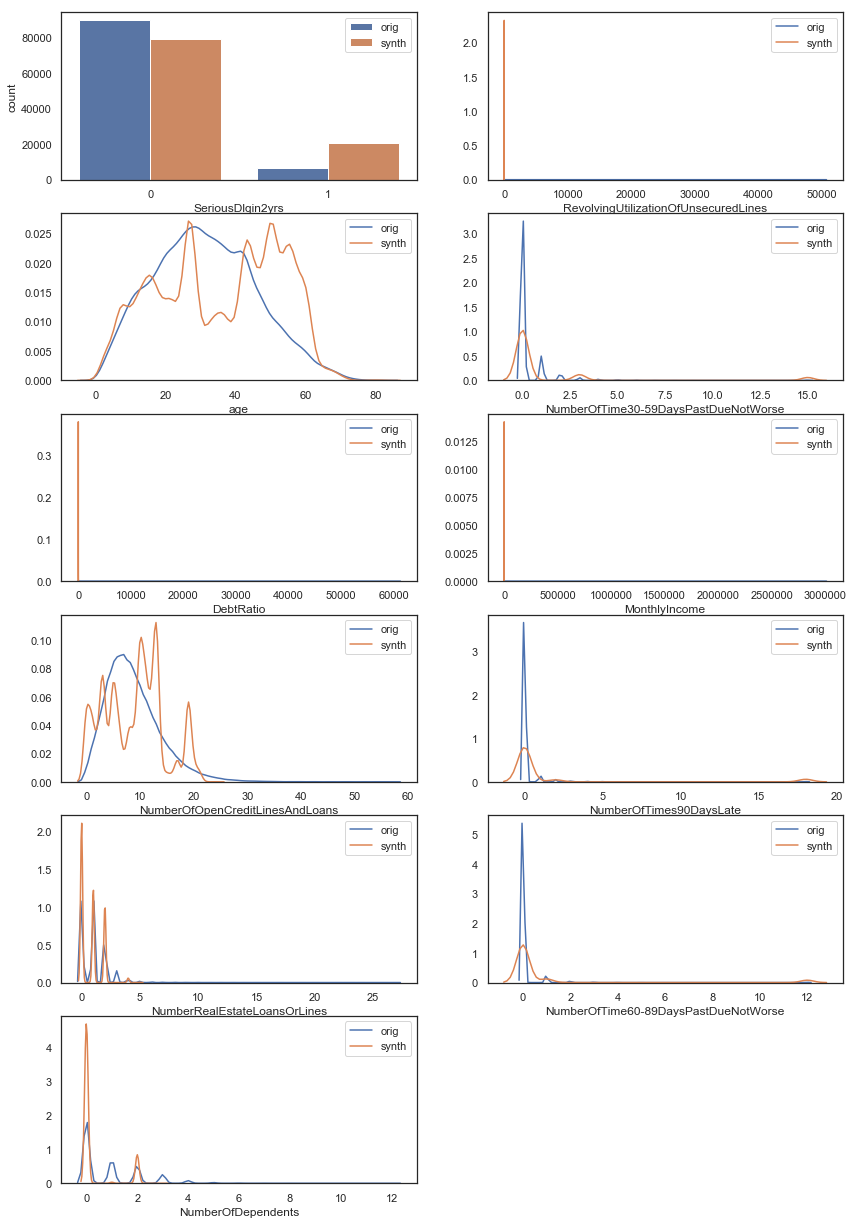

In [13]:
from synthesized.testing import UtilityTesting
testing = UtilityTesting(synthesizer, train, test, synthesized)
testing.show_distributions()

## Display correlations

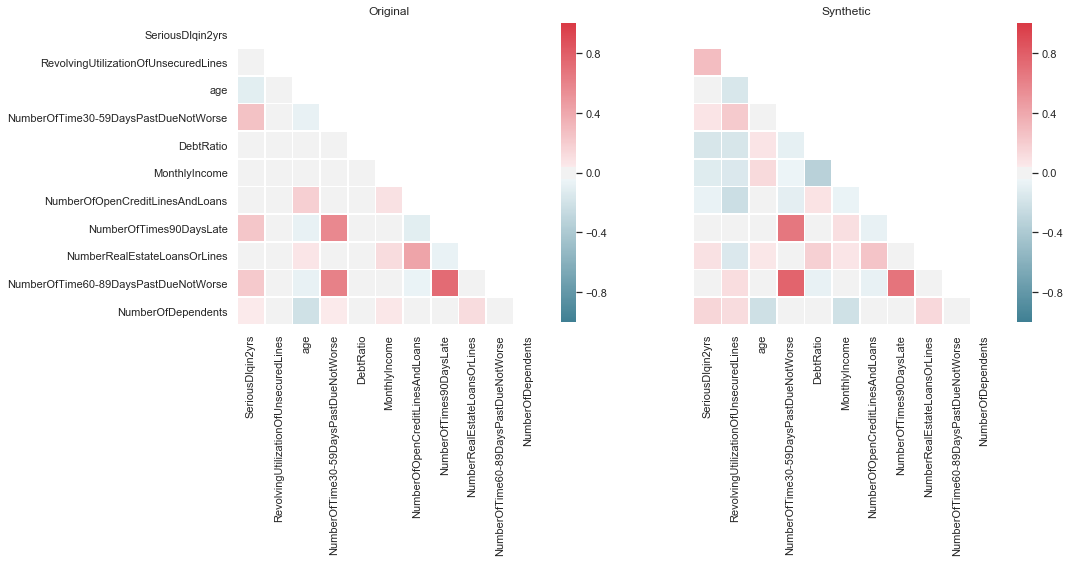

In [14]:
testing.show_corr_matrices()

## Demonstrate the utility for training ML models

The data generated by the Synthesized's tool can be used to test complex machine learning and data analytics systems more efficiently. 

In training machine learning systems, a significant part of the development cycle is taken by a comparative analysis of system’s performances at various stages of development. The analysis requires access to sensitive information and hence the involvement of compliance and security. 

The data generated by the Synthesized's tool can effectively be used to accelerate the development cycle. Machine learning systems are trained locally against a synthetic version of sensitive data across data science teams. Original data is only requested at the end of the cycle to deploy the final version of the system. 

As a result, this leads to substantial time savings per task. In addition, new business initiatives can be unlocked.  

 

In [15]:
from sklearn.ensemble import GradientBoostingRegressor
testing.utility(target='SeriousDlqin2yrs', regressor=GradientBoostingRegressor())

ROC AUC (orig): 0.8578281099249946
ROC AUC (synth): 0.8175110790118493


<h1><center>Final dataset can be released to generate value </center></h1>

In [16]:
synthesized.head(30)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.278527,80,0,4.954597,54.521145,10,0,0,0,0.0
1,0,0.128926,82,0,2.624262,86.620689,10,0,0,0,0.0
2,0,1.307387,36,0,0.032655,116.857559,0,0,0,0,2.0
3,0,0.062284,35,0,0.118972,103.472145,7,0,1,0,0.0
4,0,0.350958,47,0,1.053951,104.302650,13,0,2,0,0.0
5,0,0.399832,45,0,0.141638,75.791954,12,0,2,0,2.0
6,0,0.559681,70,0,6.722980,92.955841,10,0,2,0,0.0
7,0,2.127439,60,0,0.156794,62.885105,4,0,0,0,0.0
8,0,0.002155,62,0,3.638255,133.285583,3,98,1,98,0.0
9,0,0.096357,47,0,20.286947,43.397320,10,0,1,0,0.0
